**Introduction**

Unstructured data, especially text, images and videos contain a wealth of information. However, due to the inherent complexity in processing and analyzing this data, people often refrain from spending extra time and effort in venturing out from structured datasets to analyze these unstructured sources of data, which can be a potential gold mine.

**Natural Language Processing (NLP)** is all about leveraging tools, techniques and algorithms to process and understand natural language-based data, which is usually unstructured like text, speech and so on. In this series of articles, we will be looking at tried and tested strategies, techniques and workflows which can be leveraged by practitioners and data scientists to extract useful insights from text data. We will also cover some useful and interesting use-cases for NLP. This article will be all about processing and understanding text data with tutorials and hands-on examples.
Outline for this Series

The nature of this series will be a mix of theoretical concepts but with a focus on hands-on techniques and strategies covering a wide variety of NLP problems. Some of the major areas that we will be covering in this series of articles include the following.

- Processing & Understanding Text
- Feature Engineering & Text Representation
- Supervised Learning Models for Text Data
- Unsupervised Learning Models for Text Data
- Advanced Topics

Feel free to suggest more ideas as this series progresses, and I will be glad to cover something I might have missed out on. A lot of these articles will showcase tips and strategies which have worked well in real-world scenarios.

**What this article covers**
This article will be covering the following aspects of NLP in detail with hands-on examples.
- Data Retrieval with Web Scraping
- Text wrangling and pre-processing
- Parts of Speech Tagging
- Shallow Parsing
- Constituency and Dependency Parsing
- Named Entity Recognition
- Emotion and Sentiment Analysis

This should give you a good idea of how to get started with analyzing syntax and semantics in text corpora.

**Motivation**

Formally, NLP is a specialized field of computer science and artificial intelligence with roots in computational linguistics. It is primarily concerned with designing and building applications and systems that enable interaction between machines and natural languages that have been evolved for use by humans. Hence, often it is perceived as a niche area to work on. And people usually tend to focus more on machine learning or statistical learning.

When I started delving into the world of data science, even I was overwhelmed by the challenges in analyzing and modeling on text data. However, after working as a Data Scientist on several challenging problems around NLP over the years, I’ve noticed certain interesting aspects, including techniques, strategies and workflows which can be leveraged to solve a wide variety of problems. I have covered several topics around NLP in my books “Text Analytics with Python” (I’m writing a revised version of this soon) and “Practical Machine Learning with Python”.
However, based on all the excellent feedback I’ve received from all my readers (yes all you amazing people out there!), the main objective and motivation in creating this series of articles is to share my learnings with more people, who can’t always find time to sit and read through a book and can even refer to these articles on the go! Thus, there is no pre-requisite to buy any of these books to learn NLP.

**Getting Started**

When building the content and examples for this article, I was thinking if I should focus on a toy dataset to explain things better, or focus on an existing dataset from one of the main sources for data science datasets. Then I thought, why not build an end-to-end tutorial, where we scrape the web to get some text data and showcase examples based on that!
The source data which we will be working on will be news articles, which we have retrieved from inshorts, a website that gives us short, 60-word news articles on a wide variety of topics, and they even have an app for it!
Inshorts, news in 60 words !
Edit description
inshorts.com
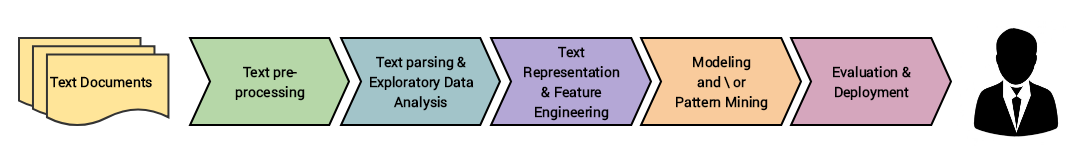
In this article, we will be working with text data from news articles on technology, sports and world news. I will be covering some basics on how to scrape and retrieve these news articles from their website in the next section.

**Standard NLP Workflow**

I am assuming you are aware of the CRISP-DM model, which is typically an industry standard for executing any data science project. Typically, any NLP-based problem can be solved by a methodical workflow that has a sequence of steps. The major steps are depicted in the following figure.

A high-level standard workflow for any NLP project
We usually start with a corpus of text documents and follow standard processes of text wrangling and pre-processing, parsing and basic exploratory data analysis. Based on the initial insights, we usually represent the text using relevant feature engineering techniques. Depending on the problem at hand, we either focus on building predictive supervised models or unsupervised models, which usually focus more on pattern mining and grouping. Finally, we evaluate the model and the overall success criteria with relevant stakeholders or customers, and deploy the final model for future usage.

**Scraping News Articles for Data Retrieval**

We will be scraping inshorts, the website, by leveraging python to retrieve news articles. We will be focusing on articles on technology, sports and world affairs. We will retrieve one page’s worth of articles for each category. A typical news category landing page is depicted in the following figure, which also highlights the HTML section for the textual content of each article.

The landing page for technology news articles and its corresponding HTML structure
Thus, we can see the specific HTML tags which contain the textual content of each news article in the landing page mentioned above. We will be using this information to extract news articles by leveraging the BeautifulSoup and requests libraries. Let’s first load up the following dependencies.
import requests

# Importing Libraries

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [20]:

seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

We will now build a function which will leverage requests to access and get the HTML content from the landing pages of each of the three news categories. Then, we will use BeautifulSoup to parse and extract the news headline and article textual content for all the news articles in each category. We find the content by accessing the specific HTML tags and classes, where they are present (a sample of which I depicted in the previous figure).

In [21]:
def build_dataset(seed_urls):
  news_data = []
  for url in seed_urls:
    news_category = url.split('/')[-1]
    data = requests.get(url)
    soup = BeautifulSoup(data.content, 'html.parser')

    news_articles = [{'news_headline': headline.find('span',
                                                     attrs={"itemprop":"headline"}).string,
                      'news_article' : article.find('div',
                                                    attrs={"itemprop":"articleBody"}).string,
                      'news_category' : news_category}
                      for headline , article in zip(soup.find_all('div',
                                                                  class_=["news-card-title news-right-box"]),
                                                    soup.find_all('div',
                                                                  class_=["news-card-content news-right-box"]))
                      ]
    news_data.extend(news_articles)
  df = pd.DataFrame(news_data)
  df = df[['news_headline','news_article','news_category']]
  return df

It is pretty clear that we extract the news headline, article text and category and build out a data frame, where each row corresponds to a specific news article. We will now invoke this function and build our dataset.

In [22]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,11-yr-old who aims for 'immortality' becomes w...,Belgium's 11-year-old Laurent Simons has becom...,technology
1,China's major tech firms lose $823 billion in ...,Major technology firms in China have seen a co...,technology
2,"Bezos refused to take elevator, ran up 14 flig...",Amazon Founder Jeff Bezos refused to take the ...,technology
3,Twitter restricts account of New Zealand profe...,"New Zealand Professor Anne-Marie Brady, who sp...",technology
4,"Shocked at conduct: Court on Juhi, others not ...",After Juhi Chawla and other plaintiffs filed a...,technology
5,Bezos' wealth hits record $211 bn as Pentagon ...,World's richest person and Amazon Founder Jeff...,technology
6,Pentagon cancels $10 bn JEDI contract that Ama...,The US Defense Department on Tuesday cancelled...,technology
7,"Will appear before UP Police, if I won't be ar...","Twitter India MD Manish Maheshwari, who was ea...",technology
8,"DiDi's CEO, Prez lose $1.5 bn in 2 days as sha...",DiDi's founder and president lost $1.5 billion...,technology
9,Bezos' ex-wife MacKenzie Scott's wealth jumps ...,"MacKenzie Scott, philanthropist and the world'...",technology


In [23]:
news_df.shape

(75, 3)

We, now, have a neatly formatted dataset of news articles and you can quickly check the total number of news articles with the following code.

In [24]:
news_df['news_category'].value_counts()

sports        25
world         25
technology    25
Name: news_category, dtype: int64

#Text Wrangling & Pre-processing

There are usually multiple steps involved in cleaning and pre-processing textual data. I have covered text pre-processing in detail in Chapter 3 of ‘Text Analytics with Python’ (code is open-sourced). However, in this section, I will highlight some of the most important steps which are used heavily in Natural Language Processing (NLP) pipelines and I frequently use them in my NLP projects. We will be leveraging a fair bit of nltk and spacy, both state-of-the-art libraries in NLP. Typically a pip install <library> or a conda install <library> should suffice. However, in case you face issues with loading up spacy’s language models, feel free to follow the steps highlighted below to resolve this issue (I had faced this issue in one of my systems).

# OPTIONAL: ONLY USE IF SPACY FAILS TO LOAD LANGUAGE MODEL
# Use the following command to install spaCy
> pip install -U spacy
OR
> conda install -c conda-forge spacy
# Download the following language model and store it in disk
https://github.com/explosion/spacy-models/releases/tag/en_core_web_md-2.0.0
# Link the same to spacy 
> python -m spacy link ./spacymodels/en_core_web_md-2.0.0/en_core_web_md en_core
Linking successful
    ./spacymodels/en_core_web_md-2.0.0/en_core_web_md --> ./Anaconda3/lib/site-packages/spacy/data/en_core

You can now load the model via spacy.load('en_core')

# ❗ IMPORTANT NOTE: 
A lot of you have messaged me about not being able to load the contractions module. It’s not a standard python module. We leverage a standard set of contractions available in the contractions.py file in my repository.Please add it in the same directory you run your code from, else it will not work.

Let’s now load up the necessary dependencies for text pre-processing. We will remove negation words from stop words, since we would want to keep them as they might be useful, especially during sentiment analysis.


In [25]:
#pip install contractions

In [26]:

import contractions
contractions.fix("you're happy now")
# "you are happy now"

'you are happy now'

In [27]:
import spacy
import nltk
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import contractions_dict
import unicodedata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

#Removing HTML tags

Often, unstructured text contains a lot of noise, especially if you use techniques like web or screen scraping. HTML tags are typically one of these components which don’t add much value towards understanding and analyzing text.

In [29]:
pip install BeautifulSoup

  Using cached https://files.pythonhosted.org/packages/40/f2/6c9f2f3e696ee6a1fb0e4d7850617e224ed2b0b1e872110abffeca2a09d4/BeautifulSoup-3.2.2.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [30]:
def strip_html_tags(text):
  soup = BeautifulSoup(text, 'html.parser')
  striped_text = soup.get_text()
  return striped_text

#Example
strip_html_tags("<html><h2>Some important text</h2></html>")

'Some important text'

It is quite evident from the above output that we can remove unnecessary HTML tags and retain the useful textual information from any document.

#Removing accented characters

Usually in any text corpus, you might be dealing with accented characters/letters, especially if you only want to analyze the English language. Hence, we need to make sure that these characters are converted and standardized into ASCII characters. A simple example — converting é to e.

In [31]:
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
  return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

The preceding function shows us how we can easily convert accented characters to normal English characters, which helps standardize the words in our corpus.

#Expanding Contractions
Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.
We leverage a standard set of contractions available in the contractions.py file in my repository.


In [32]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

NameError: ignored

We can see how our function helps expand the contractions from the preceding output. Are there better ways of doing this? Definitely! If we have enough examples, we can even train a deep learning model for better performance.

#Removing Special Characters
Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. Usually, simple regular expressions (regexes) can be used to remove them.


In [33]:
def remove_special_characters(text,remove_digits=False):
  pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
  text = re.sub(pattern,'',text)
  return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

I’ve kept removing digits as optional, because often we might need to keep them in the pre-processed text.

#Stemming
To understand stemming, you need to gain some perspective on what word stems represent. Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. Consider the word JUMP. You can add affixes to it and form new words like JUMPS, JUMPED, and JUMPING. In this case, the base word JUMP is the word stem.
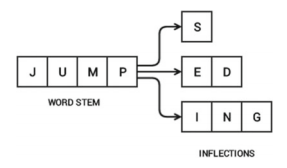

The figure shows how the word stem is present in all its inflections, since it forms the base on which each inflection is built upon using affixes. The reverse process of obtaining the base form of a word from its inflected form is known as stemming. Stemming helps us in standardizing words to their base or root stem, irrespective of their inflections, which helps many applications like classifying or clustering text, and even in information retrieval. Let’s see the popular Porter stemmer in action now!

In [34]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

The Porter stemmer is based on the algorithm developed by its inventor, Dr. Martin Porter. Originally, the algorithm is said to have had a total of five different phases for reduction of inflections to their stems, where each phase has its own set of rules.

Do note that usually stemming has a fixed set of rules, hence, the root stems may not be lexicographically correct. Which means, the stemmed words may not be semantically correct, and might have a chance of not being present in the dictionary (as evident from the preceding output).

#Lemmatization
Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary. Both nltk and spacy have excellent lemmatizers. We will be using spacy here.


In [35]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

You can see that the semantics of the words are not affected by this, yet our text is still standardized.

Do note that the lemmatization process is considerably slower than stemming, because an additional step is involved where the root form or lemma is formed by removing the affix from the word if and only if the lemma is present in the dictionary.

#Removing Stopwords
Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and the like.


In [36]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

There is no universal stopword list, but we use a standard English language stopwords list from nltk. You can also add your own domain-specific stopwords as needed.

#Bringing it all together — Building a Text Normalizer
While we can definitely keep going with more techniques like correcting spelling, grammar and so on, let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.

In [37]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=False,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Let’s now put this function in action! We will first combine the news headline and the news article text together to form a document for each piece of news. Then, we will pre-process them.

In [38]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'china major tech firm lose billion market value since feb major technology firm china see combine billion wipe market value since february peak amid chinese government crackdown accord bloomberg tencent alibaba among firm suffer loss market value recently china decision remove didi app store erase billion market value bloomberg report',
 'full_text': "China's major tech firms lose $823 billion in market value since Feb. Major technology firms in China have seen a combined $823 billion wiped from their market value since a February peak amid Chinese government's crackdown, according to Bloomberg. Tencent, Alibaba are among the 10 firms that suffered losses in market value. Recently, China's decision to remove DiDi from app stores, erased over $15 billion of its market value, Bloomberg reported."}

Thus, you can see how our text pre-processor helps in pre-processing our news articles! After this, you can save this dataset to disk if needed, so that you can always load it up later for future analysis.

In [39]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

#Understanding Language Syntax and Structure
For any language, syntax and structure usually go hand in hand, where a set of specific rules, conventions, and principles govern the way words are combined into phrases; phrases get combines into clauses; and clauses get combined into sentences. We will be talking specifically about the English language syntax and structure in this section. In English, words usually combine together to form other constituent units. These constituents include words, phrases, clauses, and sentences. Considering a sentence, “The brown fox is quick and he is jumping over the lazy dog”, it is made of a bunch of words and just looking at the words by themselves don’t tell us much.
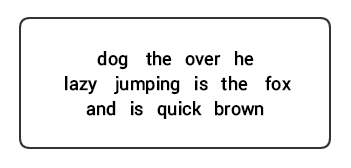
Knowledge about the structure and syntax of language is helpful in many areas like text processing, annotation, and parsing for further operations such as text classification or summarization. Typical parsing techniques for understanding text syntax are mentioned below.
- Parts of Speech (POS) Tagging
- Shallow Parsing or Chunking
- Constituency Parsing
- Dependency Parsing

We will be looking at all of these techniques in subsequent sections. Considering our previous example sentence “The brown fox is quick and he is jumping over the lazy dog”, if we were to annotate it using basic POS tags, it would look like the following figure.
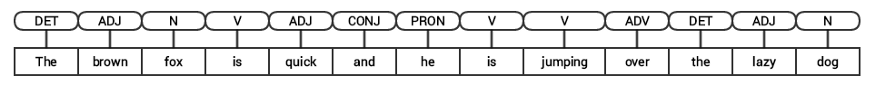
Thus, a sentence typically follows a hierarchical structure consisting the following components,

sentence → clauses → phrases → words


#Tagging Parts of Speech
Parts of speech (POS) are specific lexical categories to which words are assigned, based on their syntactic context and role. Usually, words can fall into one of the following major categories.

**N(oun):** This usually denotes words that depict some object or entity, which may be living or nonliving. Some examples would be fox , dog , book , and so on. The POS tag symbol for nouns is N.

**V(erb):** Verbs are words that are used to describe certain actions, states, or occurrences. There are a wide variety of further subcategories, such as auxiliary, reflexive, and transitive verbs (and many more). Some typical examples of verbs would be running , jumping , read , and write . The POS tag symbol for verbs is V.

**Adj(ective):** Adjectives are words used to describe or qualify other words, typically nouns and noun phrases. The phrase beautiful flower has the noun (N) flower which is described or qualified using the adjective (ADJ) beautiful . The POS tag symbol for adjectives is ADJ .

**Adv(erb):** Adverbs usually act as modifiers for other words including nouns, adjectives, verbs, or other adverbs. The phrase very beautiful flower has the adverb (ADV) very , which modifies the adjective (ADJ) beautiful , indicating the degree to which the flower is beautiful. The POS tag symbol for adverbs is ADV.

Besides these four major categories of parts of speech , there are other categories that occur frequently in the English language. These include pronouns, prepositions, interjections, conjunctions, determiners, and many others. Furthermore, each POS tag like the noun (N) can be further subdivided into categories like singular nouns (NN), singular proper nouns (NNP), and plural nouns (NNS).

The process of classifying and labeling POS tags for words called parts of speech tagging or POS tagging . POS tags are used to annotate words and depict their POS, which is really helpful to perform specific analysis, such as narrowing down upon nouns and seeing which ones are the most prominent, word sense disambiguation, and grammar analysis. We will be leveraging both nltk and spacy which usually use the Penn Treebank notation for POS tagging.


In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [41]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])


,Word,POS tag,Tag type
0,China,NNP,PROPN
1,'s,POS,PART
2,major,JJ,ADJ
3,tech,NN,NOUN
4,firms,NNS,NOUN
5,lose,VBP,VERB
6,$,$,SYM
7,823,CD,NUM
8,billion,CD,NUM
9,in,IN,ADP


In [42]:

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,China's,NNP
1,major,JJ
2,tech,NN
3,firms,NNS
4,lose,VBP
5,$823,JJ
6,billion,CD
7,in,IN
8,market,NN
9,value,NN


We can see that each of these libraries treat tokens in their own way and assign specific tags for them. Based on what we see, spacy seems to be doing slightly better than nltk.

#Shallow Parsing or Chunking
Based on the hierarchy we depicted earlier, groups of words make up phrases. There are five major categories of phrases:
**Noun phrase (NP):** These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.
Verb phrase (VP): These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.

**Adjective phrase (ADJP):** These are phrases with an adjective as the head word. Their main role is to describe or qualify nouns and pronouns in a sentence, and they will be either placed before or after the noun or pronoun.
Adverb phrase (ADVP): These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.

**Prepositional phrase (PP):** These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.




Shallow parsing, also known as light parsing or chunking , is a popular natural language processing technique of analyzing the structure of a sentence to break it down into its smallest constituents (which are tokens such as words) and group them together into higher-level phrases. This includes POS tags as well as phrases from a sentence.

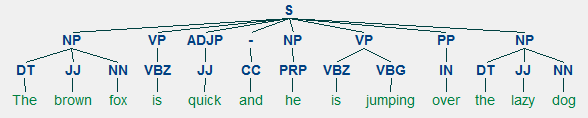

We will leverage the conll2000 corpus for training our shallow parser model. This corpus is available in nltk with chunk annotations and we will be using around 10K records for training our model. A sample annotated sentence is depicted as follows.

In [43]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


True

In [44]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


From the preceding output, you can see that our data points are sentences that are already annotated with phrases and POS tags metadata that will be useful in training our shallow parser model. We will leverage two chunking utility functions, tree2conlltags , to get triples of word, tag, and chunk tags for each token, and conlltags2tree to generate a parse tree from these token triples. We will be using these functions to train our parser. A sample is depicted below.

In [45]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

The chunk tags use the IOB format. This notation represents Inside, Outside, and Beginning. The B- prefix before a tag indicates it is the beginning of a chunk, and I- prefix indicates that it is inside a chunk. The O tag indicates that the token does not belong to any chunk. The B- tag is always used when there are subsequent tags of the same type following it without the presence of O tags between them.

We will now define a function conll_tag_ chunks() to extract POS and chunk tags from sentences with chunked annotations and a function called combined_taggers() to train multiple taggers with backoff taggers (e.g. unigram and bigram taggers)

In [46]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

We will now define a class NGramTagChunker that will take in tagged sentences as training input, get their (word, POS tag, Chunk tag) WTC triples, and train a BigramTagger with a UnigramTagger as the backoff tagger. We will also define a parse() function to perform shallow parsing on new sentences

The UnigramTagger , BigramTagger , and TrigramTagger are classes that inherit from the base class NGramTagger , which itself inherits from the ContextTagger class , which inherits from the SequentialBackoffTagger class .

We will use this class to train on the conll2000 chunked train_data and evaluate the model performance on the test_data

In [47]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

# define the chunker class
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


Our chunking model gets an accuracy of around 90% which is quite good! Let’s now leverage this model to shallow parse and chunk our sample news article headline which we used earlier, “US unveils world’s most powerful supercomputer, beats China”.

In [48]:
chunk_tree = ntc.parse(nltk_pos_tagged)

print(chunk_tree)

(S
  (NP China's/NNP major/JJ tech/NN firms/NNS)
  (VP lose/VBP)
  (NP $823/JJ billion/CD)
  (PP in/IN)
  (NP market/NN value/NN)
  (PP since/IN)
  (NP Feb/NNP))




Output:
-------
(S

  (NP US/NNP)

  (VP unveils/VBZ world's/VBZ)

  (NP most/RBS powerful/JJ supercomputer,/JJ beats/NNS China/NNP))

Thus you can see it has identified two noun phrases (NP) and one verb phrase (VP) in the news article. Each word’s POS tags are also visible. We can also visualize this in the form of a tree as follows. You might need to install ghostscript in case nltk throws an error.

In [49]:
import matplotlib
matplotlib.use('Agg')
from IPython.display import display

## download and install ghostscript from https://www.ghostscript.com/download/gsdnld.html

# often need to add to the path manually (for windows)
os.environ['PATH'] = os.environ['PATH']+";C:\\Program Files\\gs\\gs9.54.0\\bin\\"

display(chunk_tree)

TclError: ignored

Tree('S', [Tree('NP', [("China's", 'NNP'), ('major', 'JJ'), ('tech', 'NN'), ('firms', 'NNS')]), Tree('VP', [('lose', 'VBP')]), Tree('NP', [('$823', 'JJ'), ('billion', 'CD')]), Tree('PP', [('in', 'IN')]), Tree('NP', [('market', 'NN'), ('value', 'NN')]), Tree('PP', [('since', 'IN')]), Tree('NP', [('Feb', 'NNP')])])

The preceding output gives a good sense of structure after shallow parsing the news headline.

#Constituency Parsing
Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. Each and every word usually belongs to a specific lexical category in the case and forms the head word of different phrases. These phrases are formed based on rules called phrase structure rules.

Phrase structure rules form the core of constituency grammars, because they talk about syntax and rules that govern the hierarchy and ordering of the various constituents in the sentences. These rules cater to two things primarily.

They determine what words are used to construct the phrases or constituents.
They determine how we need to order these constituents together.
The generic representation of a phrase structure rule is S → AB , which depicts that the structure S consists of constituents A and B , and the ordering is A followed by B . While there are several rules (refer to Chapter 1, Page 19: Text Analytics with Python, if you want to dive deeper), the most important rule describes how to divide a sentence or a clause. The phrase structure rule denotes a binary division for a sentence or a clause as S → NP VP where S is the sentence or clause, and it is divided into the subject, denoted by the noun phrase (NP) and the predicate, denoted by the verb phrase (VP).

A constituency parser can be built based on such grammars/rules, which are usually collectively available as context-free grammar (CFG) or phrase-structured grammar. The parser will process input sentences according to these rules, and help in building a parse tree.
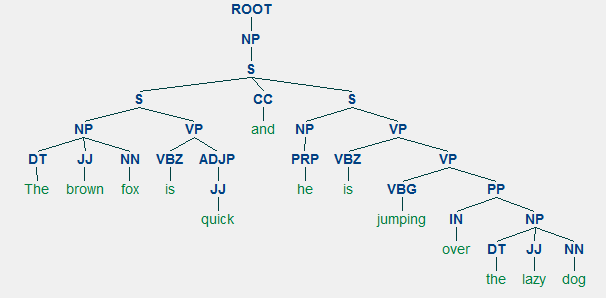

We will be using nltk and the StanfordParser here to generate parse trees.
Prerequisites: Download the official Stanford Parser from here, which seems to work quite well. You can try out a later version by going to this website and checking the Release History section. After downloading, unzip it to a known location in your filesystem. Once done, you are now ready to use the parser from nltk , which we will be exploring soon.

The Stanford parser generally uses a PCFG (probabilistic context-free grammar) parser. A PCFG is a context-free grammar that associates a probability with each of its production rules. The probability of a parse tree generated from a PCFG is simply the production of the individual probabilities of the productions used to generate it.


In [50]:
# set java path
import os
java_path = r'C:\Program Files\Java\jdk1.8.0_102\bin\java.exe'
os.environ['JAVAHOME'] = java_path

from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
                     path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

LookupError: ignored

#Named Entity Recognition
In any text document, there are particular terms that represent specific entities that are more informative and have a unique context. These entities are known as named entities , which more specifically refer to terms that represent real-world objects like people, places, organizations, and so on, which are often denoted by proper names. A naive approach could be to find these by looking at the noun phrases in text documents. Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.

SpaCy has some excellent capabilities for named entity recognition. Let’s try and use it on one of our sample news articles.

In [51]:
from spacy import displacy
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(China, 'GPE'), ($, 'MONEY'), (823, 'MONEY'), (billion, 'MONEY'), (Feb., 'CARDINAL'), (China, 'GPE'), ($, 'MONEY'), (823, 'MONEY'), (billion, 'MONEY'), (February, 'DATE'), (Chinese, 'NORP'), (Bloomberg, 'GPE'), (Alibaba, 'PERSON'), (10, 'CARDINAL'), (China, 'GPE'), (DiDi, 'ORG'), (over, 'MONEY'), ($, 'MONEY'), (15, 'MONEY'), (billion, 'MONEY'), (Bloomberg, 'ORG')]


We can clearly see that the major named entities have been identified by spacy. To understand more in detail about what each named entity means, you can refer to the documentation or check out the following table for convenience.

Let’s now find out the most frequent named entities in our news corpus! For this, we will build out a data frame of all the named entities and their types using the following code.

In [52]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

We can now transform and aggregate this data frame to find the top occuring entities and types.

In [53]:

# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,India,China,England,Bitcoin,Taliban,Chinese,Pakistan,UK,Olympics,Amazon,three,Pentagon,DiDi,6
Entity Type,GPE,GPE,GPE,GPE,GPE,ORG,NORP,GPE,GPE,EVENT,ORG,CARDINAL,ORG,ORG,CARDINAL
Frequency,17,16,10,10,9,9,8,8,7,7,6,6,6,5,5


We can also group by the entity types to get a sense of what types of entites occur most in our news corpus.

In [54]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,GPE,PERSON,ORG,CARDINAL,DATE,NORP,ORDINAL,EVENT,MONEY,PERCENT,PRODUCT,TIME,WORK_OF_ART,LOC,LAW
Frequency,140,137,135,89,81,39,27,23,21,9,5,4,3,2,2


We can see that people, places and organizations are the most mentioned entities though interestingly we also have many other entities.

Another nice NER tagger is the StanfordNERTagger available from the nltk interface. For this, you need to have Java installed and then download the Stanford NER resources. Unzip them to a location of your choice (I used E:/stanford in my system).

Stanford’s Named Entity Recognizer is based on an implementation of linear chain Conditional Random Field (CRF) sequence models. Unfortunately this model is only trained on instances of PERSON, ORGANIZATION and LOCATION types. 

Following code can be used as a standard workflow which helps us extract the named entities using this tagger and show the top named entities and their types (extraction differs slightly from spacy).

In [55]:
from nltk.tag import StanfordNERTagger
import os

# set java path
java_path = r'C:\Program Files\Java\jdk1.8.0_102\bin\java.exe'
os.environ['JAVAHOME'] = java_path

# initialize NER tagger
sn = StanfordNERTagger('E:/stanford/stanford-ner-2014-08-27/classifiers/english.all.3class.distsim.crf.ser.gz',
                       path_to_jar='E:/stanford/stanford-ner-2014-08-27/stanford-ner.jar')

# tag named entities
ner_tagged_sentences = [sn.tag(sent.split()) for sent in corpus]

# extract all named entities
named_entities = []
for sentence in ner_tagged_sentences:
    temp_entity_name = ''
    temp_named_entity = None
    for term, tag in sentence:
        if tag != 'O':
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

#named_entities = list(set(named_entities))
entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])
                            

# view top entities and types
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head(15)


# view top entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.head()

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


LookupError: ignored

We notice quite similar results though restricted to only three types of named entities. Interestingly, we see a number of mentioned of several people in various sports.

#Emotion and Sentiment Analysis
Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews. The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Usually, sentiment analysis works best on text that has a subjective context than on text with only an objective context. Objective text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings. Sentiment analysis is widely used, especially as a part of social media analysis for any domain, be it a business, a recent movie, or a product launch, to understand its reception by the people and what they think of it based on their opinions or, you guessed it, sentiment!
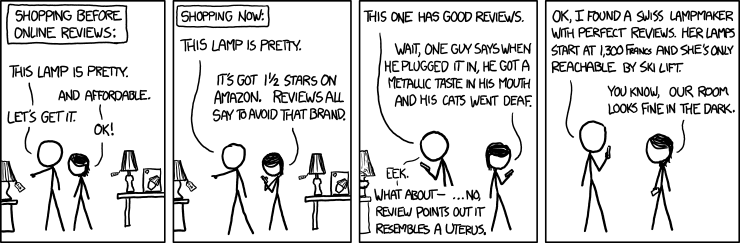

Typically, sentiment analysis for text data can be computed on several levels, including on an individual sentence level, paragraph level, or the entire document as a whole. Often, sentiment is computed on the document as a whole or some aggregations are done after computing the sentiment for individual sentences. There are two major approaches to sentiment analysis.

Supervised machine learning or deep learning approaches

##Unsupervised lexicon-based approaches
For the first approach we typically need pre-labeled data. Hence, we will be focusing on the second approach. For a comprehensive coverage of sentiment analysis, refer to Chapter 7: Analyzing Movie Reviews Sentiment, Practical Machine Learning with Python, Springer\Apress, 2018. In this scenario, we do not have the convenience of a well-labeled training dataset. Hence, we will need to use unsupervised techniques for predicting the sentiment by using knowledgebases, ontologies, databases, and lexicons that have detailed information, specially curated and prepared just for sentiment analysis. A lexicon is a dictionary, vocabulary, or a book of words. In our case, lexicons are special dictionaries or vocabularies that have been created for analyzing sentiments. Most of these lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

Various popular lexicons are used for sentiment analysis, including the following.
- AFINN lexicon
- Bing Liu’s lexicon
- MPQA subjectivity lexicon
- SentiWordNet
- VADER lexicon
- TextBlob lexicon

This is not an exhaustive list of lexicons that can be leveraged for sentiment analysis, and there are several other lexicons which can be easily obtained from the Internet. Feel free to check out each of these links and explore them. We will be covering two techniques in this section.

##Sentiment Analysis with AFINN Lexicon
The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis. Developed and curated by Finn Årup Nielsen, you can find more details on this lexicon in the paper, “A new ANEW: evaluation of a word list for sentiment analysis in microblogs”, proceedings of the ESWC 2011 Workshop. The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word. You can find this lexicon at the author’s official GitHub repository along with previous versions of it, including AFINN-111. The author has also created a nice wrapper library on top of this in Python called afinn, which we will be using for our analysis.

The following code computes sentiment for all our news articles and shows summary statistics of general sentiment per news category.


In [57]:
pip install Afinn

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for Afinn: filename=afinn-0.1-cp37-none-any.whl size=53452 sha256=6427ec9a7a17391efb4b8ab94104eab88723072213446dd42b338e37b3129a95
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn


In [58]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                           
                        count  mean       std   min  25%  50%  75%   max
news_category                                                           
sports                   25.0  3.04  6.809797 -11.0 -1.0  4.0  7.0  19.0
technology               25.0 -0.76  5.410484 -12.0 -4.0 -1.0  2.0  11.0
world                    25.0 -6.36  7.404278 -20.0 -9.0 -6.0 -2.0   6.0

We can get a good idea of general sentiment statistics across different news categories. Looks like the average sentiment is very positive in sports and reasonably negative in technology! Let’s look at some visualizations now.

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

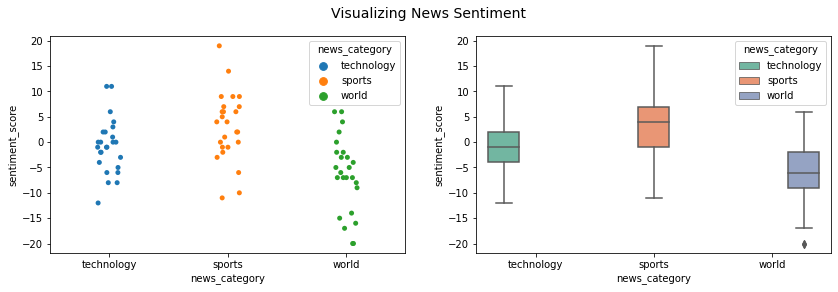

In [63]:
f

We can see that the spread of sentiment polarity is much higher in sports and world as compared to technology where a lot of the articles seem to be having a negative polarity. We can also visualize the frequency of sentiment labels.

In [87]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
sns.countplot(x="news_category", hue="sentiment_category", data=df)

In [84]:
df.sentiment_score.sort_index()

0      0.0
1     -5.0
2     -4.0
3     -8.0
4     -2.0
      ... 
70    -7.0
71    -7.0
72   -15.0
73    -5.0
74    -3.0
Name: sentiment_score, Length: 75, dtype: float64

In [82]:
#pos_idx = df[(df.news_category=='technology') & (df.sentiment_score >= 19)].index[0]
#neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -20)].index[0]
pos_idx = df[df.sentiment_score >= 19].index[0]
neg_idx = df[df.sentiment_score == -20].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: At least 233 people were killed and around 618 people were injured in more than 500 shootings across the US during the Independence Day weekend, according to the latest data compiled by the Gun Violence Archive. During the same period last year, 314 people were killed and 751 people were injured. Gun Violence Archive said the numbers may increase.

Most Positive Tech News Article: Indian men's hockey team forward Gurjant Singh has said the team is focussed to win a medal in the upcoming Tokyo Olympics. He added, "The recent experience of playing against Germany, Great Britain, and Argentina is definitely going to help us [India] when we compete against them at the Olympics." It will be 26-year-old Gurjant's maiden Olympics.


#Sentiment Analysis with TextBlob
TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. Typically, the scores have a normalized scale as compare to Afinn. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Let’s use this now to get the sentiment polarity and labels for each news article and aggregate the summary statistics per news category.


In [88]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                     ...                     
                        count     mean       std  ...    50%    75%    max
news_category                                     ...                     
sports                   25.0  0.14628  0.142660  ...  0.100  0.227  0.467
technology               25.0  0.08308  0.125958  ...  0.082  0.178  0.373
world                    25.0  0.00596  0.169779  ...  0.000  0.050  0.533

[3 rows x 8 columns]

Looks like the average sentiment is the most positive in world and least positive in technology! However, these metrics might be indicating that the model is predicting more articles as positive. Let’s look at the sentiment frequency distribution per news category.

In [94]:
sns.countplot(x="news_category", hue="sentiment_category", 
                    data=df);
                    

There definitely seems to be more positive articles across the news categories here as compared to our previous model. However, still looks like technology has the most negative articles and world, the most positive articles similar to our previous analysis. Let’s now do a comparative analysis and see if we still get similar articles in the most positive and negative categories for world news.